In [4]:
from matplotlib import pyplot as plt
from matplotlib import collections as mc
import math


In [5]:
a = (0.0, 0.0)
e = (1.0, 0.0)
ae = (a,e)

'a' is a point at (0.0, 0.0).
'e' is a point at (1.0, 0.0).
'ae' is a tuple containing both points a and e.

In [6]:
def plot_segments(segments):
    fig, ax = plt.subplots() # Create a plot
    lines = mc.LineCollection(segments) # Create line segments
    ax.add_collection(lines) # Add segments to the plot
    ax.margins(0.2) # Adjust margins
    ax.set_aspect('equal') # Set equal aspect ratio
    ax.autoscale() # autoscale to plot
    return ax

This function takes a list of line segments and draws them on a plot, ensuring they are properly scaled and spaced.

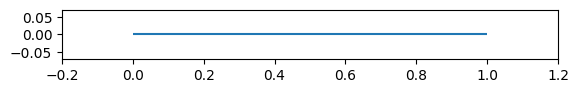

In [7]:
plot_segments([ae]);

In [8]:
b = ((2*a[0]+e[0]/3, (2*a[1]+e[1])/3)) # calculates a point b that is one-third of the way from point a to point e
d = ((a[0]+2*e[0]/3, (a[1]+2*e[1])/3)) # calculates a point d that is one-third of the way from point a to point e

In summary, the points b and d are calculated using the coordinates of a and e to ensure they divide the segment ae into three equal parts. Taking the coordinates twice is part of this weighting method.

In [9]:
k = math.sqrt(3)/6 # calculate k (height) using trigonometric properties of equilateral triangles.
c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0])) # Calculate the midpoint of the segment ae and Adjust the midpoint to form the "bump"

The purpose of this calculation is to find the third vertex of the equilateral triangle that is formed on the segment ae during the construction of the Koch snowflake. The point c is the peak of the "bump" that replaces the middle third of the segment ae.

<Figure size 640x480 with 0 Axes>

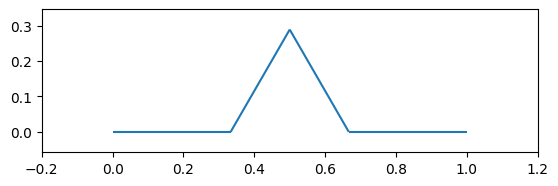

In [10]:
plt.gcf().clear() # Clearing the current figure 
plot_segments([(a,b), (b,c), (c,d), (d,e)]);

In [11]:
def f(seg):
    # Extract the points a and e from the segment 
    a = seg[0]
    e = seg[1]
    b = ((2*a[0]+e[0])/3, (2*a[1]+e[1])/3) # Calculate point b (one-third of the way from a to e)
    d = ((a[0]+2*e[0])/3, (a[1]+2*e[1])/3) # Calculate point d (two-thirds of the way from a to e)
    # Calculate point c (the tip of the equilateral triangle formed above the line segment)
    k = math.sqrt(3)/6 
    c = ((a[0]+e[0])/2 - k * (e[1]-a[1]), (a[1]+e[1])/2 + k *(e[0]-a[0]))
    return [(a,b), (b,c), (c,d), (d,e)] # Return the four new segments:

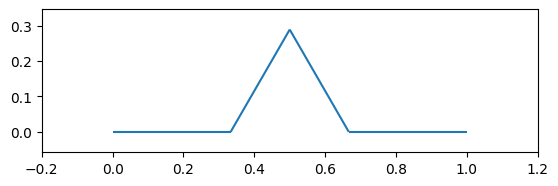

In [12]:
plot_segments(f(((0,0),(1,0))));

In [15]:
def recurse(segments):
    return [x for s in segments for x in f(s)]

In [16]:
recurse([(a,e)])

[((0.0, 0.0), (0.3333333333333333, 0.0)),
 ((0.3333333333333333, 0.0), (0.5, 0.28867513459481287)),
 ((0.5, 0.28867513459481287), (0.6666666666666666, 0.0)),
 ((0.6666666666666666, 0.0), (1.0, 0.0))]

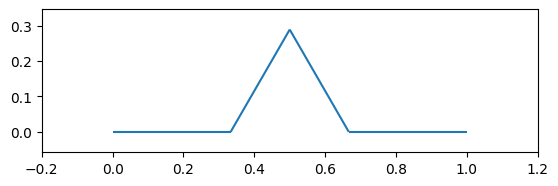

In [17]:
plot_segments(recurse([(a,e)]));

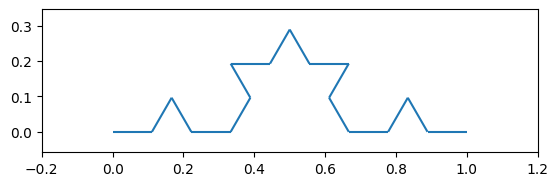

In [18]:
segements = [(a,e)]
for i in range(2):
    segements = recurse(segements)
plot_segments(segements);

In [19]:
def snowflake(n):
    p = -math.cos(math.pi/6), math.sin(math.pi/6)
    q = math.cos(math.pi/6), math.sin(5*math.pi/6)
    r = 0.0, -1.0
    segments = [(p,q), (q,r), (r,p)]
    for i in range(n):
        segments = recurse(segments)
    plot_segments(segments)

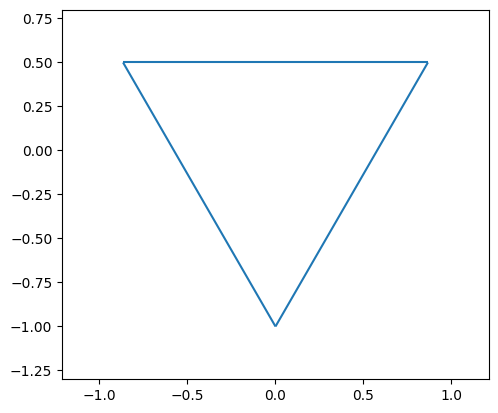

In [20]:
snowflake(0)

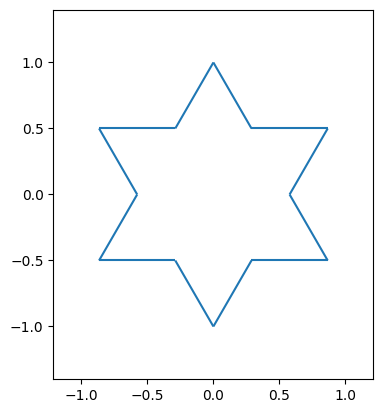

In [21]:
snowflake(1)

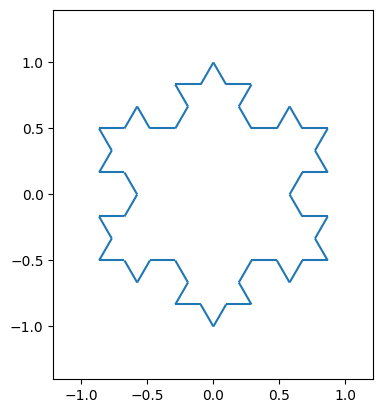

In [22]:
snowflake(2)

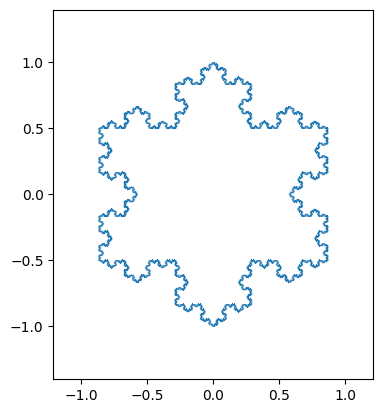

In [24]:
snowflake(6)